<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales profundas (DNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [ ]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical  
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [ ]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [ ]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

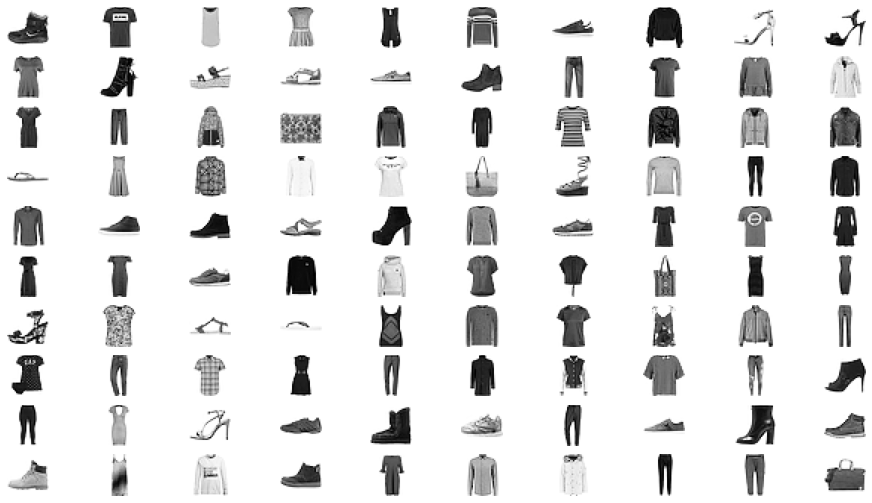

In [ ]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

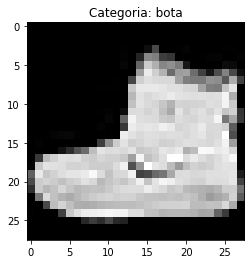

In [ ]:
# Alumno, dibuje la primera imagen y su correspondiente 
plt.imshow(data_X_train[0], cmap='gray')
plt.title("Categoria: " + str(category_list [data_y_train[0]]))
plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [ ]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)
print(data_X_train[0][14, :])

[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


In [ ]:
# Alumno: Normalizar los datos entre 0 y 1
X_train_norm = data_X_train / 255
X_test_norm = data_X_test / 255

In [ ]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)
print('Cantidad de datos en observacion:', X_train_norm.shape[0])

Cantidad de datos en observacion: 60000


In [ ]:
# Alumno: Imprimir la dimension de la imagen
print('Tamaño de la imagen:', X_train_norm[0].shape)

Tamaño de la imagen: (28, 28)


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

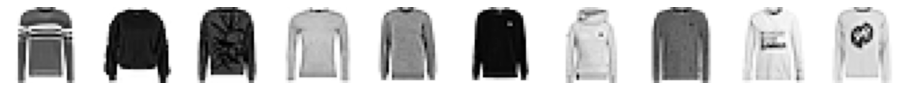

In [ ]:
# Alumno: Explorar los primeros diez puloveres del dataset de train
fig = plt.figure(figsize=(16,9))
j = 0

for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')
    while True:
        if category_list[data_y_train[j]] == "pulover":
            ax.imshow(X_train_norm[j], cmap='Greys')
            j += 1
            break
        j += 1
plt.show()

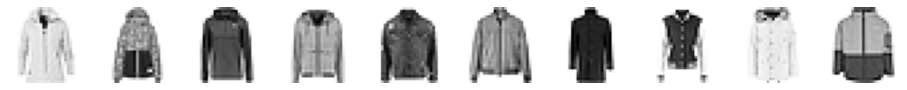

In [ ]:
# Alumno: Explorar los primeros diez sacos del dataset de train
fig = plt.figure(figsize=(16,9))
j = 0

for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')
    while True:
        if category_list[data_y_train[j]] == "saco":
            ax.imshow(X_train_norm[j], cmap='Greys')
            j += 1
            break
        j += 1
plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [ ]:
# Alumno: Transformar el espacio de variable 28x28 a un vector de 784
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension
num_pixels = X_train_norm.shape[1] * X_train_norm.shape[2]

X_train = X_train_norm.reshape(X_train_norm.shape[0], num_pixels).astype('float32')
X_test = X_test_norm.reshape(X_test_norm.shape[0], num_pixels).astype('float32')

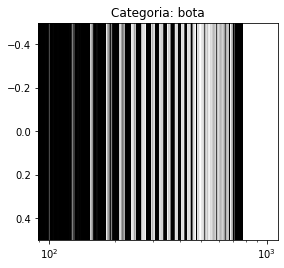

In [ ]:
# Alumno: ¿Cómo se ve ahora nuestra primera imagen?
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(X_train[0].reshape(-1,1).T, cmap='gray')
ax.set_xscale("log")
plt.title("Categoria: " + str(category_list [data_y_train[0]]))
plt.show()

In [ ]:
print('Datos en observacion:', X_train.shape)


Datos en observacion: (60000, 784)


Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [ ]:
print('Dimensión de cada imagen falten:', X_train[0].shape)

Dimensión de cada imagen falten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [ ]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test
y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# input shape
in_shape = X_train.shape[1]
in_shape

784

In [ ]:
# output shape
out_shape = y_train.shape[1]
out_shape

10

In [ ]:
from keras.layers import Dense, Dropout

# Alumno, crear un modelo con la cantidad de capas ocultas que crea
# mejor sin regularizacion

from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(in_shape,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.6278 - accuracy: 0.7782 - val_loss: 0.4482 - val_accuracy: 0.8381
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4134 - accuracy: 0.8536 - val_loss: 0.3956 - val_accuracy: 0.8576
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3759 - accuracy: 0.8659 - val_loss: 0.3725 - val_accuracy: 0.8658
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3472 - accuracy: 0.8734 - val_loss: 0.4070 - val_accuracy: 0.8523
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3258 - accuracy: 0.8815 - val_loss: 0.3403 - val_accuracy: 0.8759
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3107 - accuracy: 0.8870 - val_loss: 0.3388 - val_accuracy: 0.8756
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2975 - accuracy: 0.8917 - val_loss: 0.3584 - val_accuracy: 0.8701
Epoch 

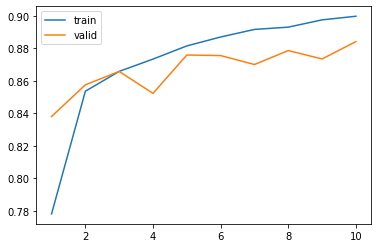

In [ ]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [ ]:
# Alumno: Tome el modelo anterior y agregue regularización
model = Sequential()

# Seleccione el dropout_ratev que mejor le funcione
dropout_rate = 0.2

model.add(Dense(units=130, activation='relu', input_shape=(in_shape,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 130)               102050    
                                                                 
 dense_21 (Dense)            (None, 64)                8384      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 115,244
Trainable params: 115,244
Non-tr

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.7255 - accuracy: 0.7428 - val_loss: 0.4450 - val_accuracy: 0.8381
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4590 - accuracy: 0.8371 - val_loss: 0.4031 - val_accuracy: 0.8511
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4056 - accuracy: 0.8554 - val_loss: 0.3802 - val_accuracy: 0.8579
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3755 - accuracy: 0.8643 - val_loss: 0.3530 - val_accuracy: 0.8720
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3560 - accuracy: 0.8718 - val_loss: 0.3401 - val_accuracy: 0.8779
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3354 - accuracy: 0.8796 - val_loss: 0.3412 - val_accuracy: 0.8784
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3251 - accuracy: 0.8813 - val_loss: 0.3394 - val_accuracy: 0.8778
Epoch 

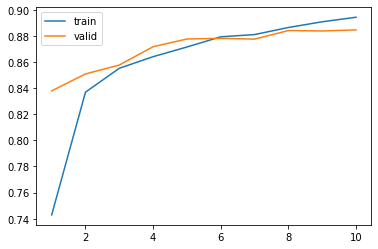

In [ ]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [ ]:
# Alumno: Predecir las probabilidades del dataset X_test
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

array([[4.06653771e-06, 5.31973967e-07, 1.05682113e-06, 2.01608436e-05,
        1.00112413e-06, 2.07991130e-03, 2.52893756e-06, 6.18772535e-03,
        4.16578274e-07, 9.91702616e-01],
       [2.19167869e-05, 4.91166940e-10, 9.95969772e-01, 5.05079981e-07,
        1.91758049e-03, 9.35281436e-11, 2.08984921e-03, 9.10284695e-11,
        2.97844622e-07, 1.36962976e-11],
       [1.11178969e-10, 1.00000000e+00, 3.34136350e-15, 8.66249628e-10,
        5.27174875e-13, 1.59026993e-18, 6.79254613e-13, 5.73641556e-21,
        1.02447713e-13, 1.49633560e-22]], dtype=float32)

In [ ]:
# Alumno: Transformar las probabilidades en y_hat usando argmax
y_hat = np.argmax(y_hat_prob,axis=1)
y_hat[:3]

array([9, 2, 1])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [ ]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.3525 - accuracy: 0.8766


0.8766000270843506

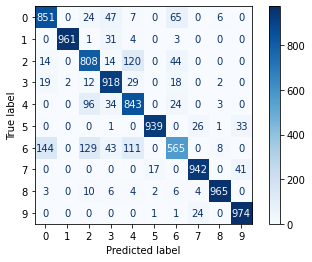

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [ ]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [ ]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco
X_test_peores = X_test[rank_saco]
y_test_peores = y_test[rank_saco]

In [ ]:
# Alumno: Calcular la exactitud de los sacos seleccionados
score = model.evaluate(X_test_peores, y_test_peores)
score[1]

1/1 [==============================] - 0s 28ms/step - loss: 2.0337 - accuracy: 0.1000


0.10000000149011612

In [ ]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)
y_hat_prob_saco = model.predict(X_test_peores)
y_hat_saco = np.argmax(y_hat_prob_saco,axis=1)
y_hat_saco

array([2, 2, 2, 6, 4, 2, 2, 2, 2, 2])

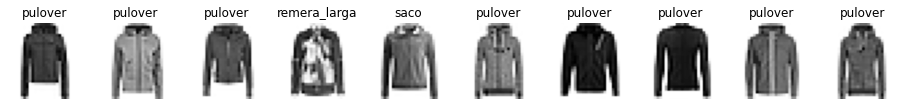

In [ ]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría



fig = plt.figure(figsize=(16,9))
j = 0

for i in rank_saco:
    ax = fig.add_subplot(1, 10, j+1)
    ax.axis('off')
    ax.imshow(X_test_norm[i], cmap='Greys')
    ax.set_title(category_list[y_hat_saco[j]])
    j += 1

plt.show()

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Al utilizar deep larning no es posible diferenciar bien entre los sacos y los puloveres, el modelo es incapaz de ver los botones o los cierres que son la clave para diferenciarlos. Una alternativa es probar con redes más aptas para detección de imagenes (las CNN convolucionales, que veremos más adelante)